In [1]:
def square(x):
    return x**2

In [3]:
[square(x) for x in [1,2,3]]

[1, 4, 9]

In [5]:
list(map(square, [1,2,3]))

[1, 4, 9]

In [6]:
def my_add(x, y):
    return x + y

In [7]:
from functools import reduce

In [8]:
reduce(my_add, [1,2,3,4])

10

In [9]:
my_add(1, my_add(2, my_add(3,4)))

10

In [10]:
reduce(my_add, map(square, [1,2,3,4]))

30

In [11]:
pairs = list(map(lambda x: (x %2, x**2), [1,2,3,4,5,6]))

In [12]:
pairs

[(1, 1), (0, 4), (1, 9), (0, 16), (1, 25), (0, 36)]

In [13]:
from pyspark import SparkContext

In [14]:
sc = SparkContext()

In [15]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [17]:
RDD = sc.parallelize([1,2,3,4])

In [18]:
RDD.collect()

[1, 2, 3, 4]

In [20]:
RDD.map(square).collect()

[1, 4, 9, 16]

In [21]:
RDD.map(square).reduce(my_add)

30

In [22]:
sc.parallelize(pairs).collect()

[(1, 1), (0, 4), (1, 9), (0, 16), (1, 25), (0, 36)]

In [23]:
sc.parallelize(pairs).reduceByKey(my_add).collect()

[(0, 56), (1, 35)]

# Data Frames

In [25]:
with open('data/winequality-white.csv') as wine_file:
    header = wine_file.readline()
    wines = sc.parallelize(wine_file.readlines())

In [26]:
wines.take(5)

['7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n',
 '6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n',
 '8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n',
 '7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n',
 '7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n']

In [27]:
header

'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n'

In [28]:
header = [i.strip().replace('"', '') for i in header.split(';')]

In [29]:
header

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [30]:
from pyspark.sql import Row

In [31]:
Row(name='Jack', last_name='Sparrow', rank='Captain')

Row(last_name='Sparrow', name='Jack', rank='Captain')

In [33]:
Row(**{'name': 'Jack', 'last_name': 'Sparrow', 'rank': 'Captain'})

Row(last_name='Sparrow', name='Jack', rank='Captain')

In [38]:
for i,j in zip(['a', 'b', 'c'], [1, 2, 3, 4, 5]):
    print(i, j)

a 1
b 2
c 3


In [40]:
(wines
 .map(lambda line: [float(i.strip()) for i in line.split(';')])
 .map(lambda values: Row(**{name: value for name, value in zip(header, values)}))).take(5)

[Row(alcohol=8.8, chlorides=0.045, citric acid=0.36, density=1.001, fixed acidity=7.0, free sulfur dioxide=45.0, pH=3.0, quality=6.0, residual sugar=20.7, sulphates=0.45, total sulfur dioxide=170.0, volatile acidity=0.27),
 Row(alcohol=9.5, chlorides=0.049, citric acid=0.34, density=0.994, fixed acidity=6.3, free sulfur dioxide=14.0, pH=3.3, quality=6.0, residual sugar=1.6, sulphates=0.49, total sulfur dioxide=132.0, volatile acidity=0.3),
 Row(alcohol=10.1, chlorides=0.05, citric acid=0.4, density=0.9951, fixed acidity=8.1, free sulfur dioxide=30.0, pH=3.26, quality=6.0, residual sugar=6.9, sulphates=0.44, total sulfur dioxide=97.0, volatile acidity=0.28),
 Row(alcohol=9.9, chlorides=0.058, citric acid=0.32, density=0.9956, fixed acidity=7.2, free sulfur dioxide=47.0, pH=3.19, quality=6.0, residual sugar=8.5, sulphates=0.4, total sulfur dioxide=186.0, volatile acidity=0.23),
 Row(alcohol=9.9, chlorides=0.058, citric acid=0.32, density=0.9956, fixed acidity=7.2, free sulfur dioxide=47.

In [42]:
sc.parallelize([None, True, 'abc', 5]).collect()

[None, True, 'abc', 5]

In [43]:
from pyspark.sql import SparkSession

In [45]:
spark = SparkSession.builder\
 .appName('My Spark App')\
    .getOrCreate()

In [46]:
df = spark.createDataFrame(
wines
 .map(lambda line: [float(i.strip()) for i in line.split(';')])
 .map(lambda values: Row(**{name: value for name, value in zip(header, values)}))
)

In [47]:
df['alcohol', 'quality', 'residual sugar'].show(5)

+-------+-------+--------------+
|alcohol|quality|residual sugar|
+-------+-------+--------------+
|    8.8|    6.0|          20.7|
|    9.5|    6.0|           1.6|
|   10.1|    6.0|           6.9|
|    9.9|    6.0|           8.5|
|    9.9|    6.0|           8.5|
+-------+-------+--------------+
only showing top 5 rows



In [54]:
df.select((df['quality'] - 1).alias('qual. minus 1'), df.quality, 'quality',
          df['residual sugar'].alias('sugar')).show(5)

+-------------+-------+-------+-----+
|qual. minus 1|quality|quality|sugar|
+-------------+-------+-------+-----+
|          5.0|    6.0|    6.0| 20.7|
|          5.0|    6.0|    6.0|  1.6|
|          5.0|    6.0|    6.0|  6.9|
|          5.0|    6.0|    6.0|  8.5|
|          5.0|    6.0|    6.0|  8.5|
+-------------+-------+-------+-----+
only showing top 5 rows



In [60]:
df.select(df['alcohol'] > 10).show(5)

+--------------+
|(alcohol > 10)|
+--------------+
|         false|
|         false|
|          true|
|         false|
|         false|
+--------------+
only showing top 5 rows



In [62]:
df.filter(df['alcohol'] > 10).select('quality', 'residual sugar').show(10)

+-------+--------------+
|quality|residual sugar|
+-------+--------------+
|    6.0|           6.9|
|    6.0|           6.9|
|    6.0|           1.5|
|    5.0|          1.45|
|    5.0|           1.2|
|    7.0|           1.5|
|    7.0|           1.5|
|    8.0|           1.2|
|    6.0|           1.1|
|    8.0|           1.2|
+-------+--------------+
only showing top 10 rows



In [64]:
pdf = df.toPandas()

In [65]:
%matplotlib inline

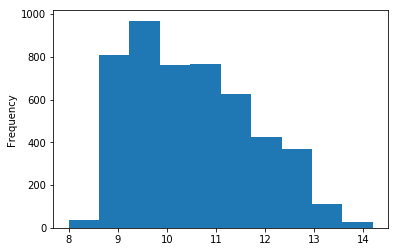

In [66]:
pdf.alcohol.plot.hist()

In [67]:
from pyspark.ml.feature import VectorAssembler

In [70]:
va = VectorAssembler(inputCols=['alcohol', 'residual sugar', 'sulphates'],
                     outputCol='features')

In [73]:
va.transform(df).select('features', 'alcohol', 'residual sugar', 'sulphates').show(5)

+---------------+-------+--------------+---------+
|       features|alcohol|residual sugar|sulphates|
+---------------+-------+--------------+---------+
|[8.8,20.7,0.45]|    8.8|          20.7|     0.45|
| [9.5,1.6,0.49]|    9.5|           1.6|     0.49|
|[10.1,6.9,0.44]|   10.1|           6.9|     0.44|
|  [9.9,8.5,0.4]|    9.9|           8.5|      0.4|
|  [9.9,8.5,0.4]|    9.9|           8.5|      0.4|
+---------------+-------+--------------+---------+
only showing top 5 rows



In [74]:
X = va.transform(df).select(df['quality'].alias('label'), 'features')

In [76]:
X.show(5)

+-----+---------------+
|label|       features|
+-----+---------------+
|  6.0|[8.8,20.7,0.45]|
|  6.0| [9.5,1.6,0.49]|
|  6.0|[10.1,6.9,0.44]|
|  6.0|  [9.9,8.5,0.4]|
|  6.0|  [9.9,8.5,0.4]|
+-----+---------------+
only showing top 5 rows



In [77]:
train, test = X.randomSplit([0.7, 0.3])

In [78]:
from pyspark.ml.regression import DecisionTreeRegressor

In [79]:
model = DecisionTreeRegressor(maxDepth=3).fit(train)

In [80]:
predictions = model.transform(test)

In [81]:
predictions.show(5)

+-----+---------------+-----------------+
|label|       features|       prediction|
+-----+---------------+-----------------+
|  3.0| [9.8,16.2,0.5]|5.709821428571429|
|  3.0|[11.5,11.0,0.4]|6.053497942386831|
|  4.0|[10.1,10.5,0.3]|5.417910447761194|
|  4.0|[12.5,5.0,0.53]|6.650224215246637|
|  5.0|  [8.5,9.1,0.5]|5.417910447761194|
+-----+---------------+-----------------+
only showing top 5 rows



In [83]:
predictions.select(predictions['prediction'] - predictions['label']).show(5)

+--------------------+
|(prediction - label)|
+--------------------+
|   2.709821428571429|
|   3.053497942386831|
|  1.4179104477611943|
|   2.650224215246637|
| 0.41791044776119435|
+--------------------+
only showing top 5 rows



In [84]:
from pyspark.ml.evaluation import RegressionEvaluator

In [85]:
evaluator = RegressionEvaluator()

In [87]:
evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})

0.8001104230954292

In [88]:
evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

0.17776916154793276

In [89]:
evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})

0.6392407882009342

In [90]:
sc.stop()